In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
df = pd.read_csv('/content/New Year Sales Data.csv', encoding='latin-1')

In [92]:
# Check for null values
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [93]:
# Drop unnecessary columns (assuming 'Status' and 'unnamed1' are unnecessary)
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [94]:
# Drop rows with null values
df.dropna(inplace=True)

df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [95]:
df['Amount'] = df['Amount'].astype(int)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


None

In [96]:
# Get summary statistics
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [97]:
# Check for unique values in columns
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values per column:
User_ID: 3752 unique values
Cust_name: 1250 unique values
Product_ID: 2350 unique values
Gender: 2 unique values
Age Group: 7 unique values
Age: 81 unique values
Marital_Status: 2 unique values
State: 16 unique values
Zone: 5 unique values
Occupation: 15 unique values
Product_Category: 18 unique values
Orders: 4 unique values
Amount: 6583 unique values


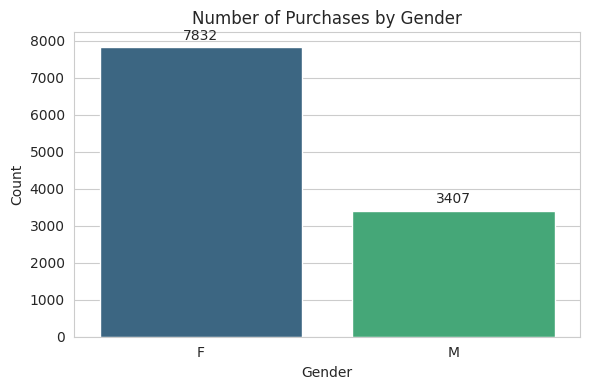

In [98]:
# Count plot with labels
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Gender', hue='Gender', palette='viridis', legend=False)

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

# Add titles and labels
plt.title("Number of Purchases by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

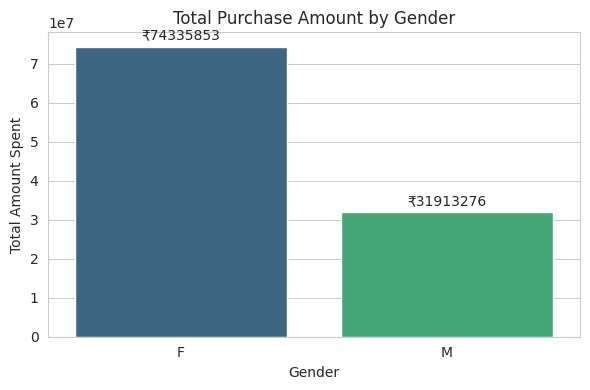

In [99]:
# Create the bar plot using grouped data
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=gender_sales, x='Gender', y='Amount', hue='Gender', palette='viridis', legend=False)

# Step 3: Add labels to each bar (total amounts)
for container in ax.containers:
    ax.bar_label(container, fmt='₹%.0f', label_type='edge', padding=3)

# Step 4: Customize chart
plt.title("Total Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount Spent")
plt.tight_layout()
plt.show()

In [100]:
#Females have a higher number of purchases and higher total purchasing power compared to males.

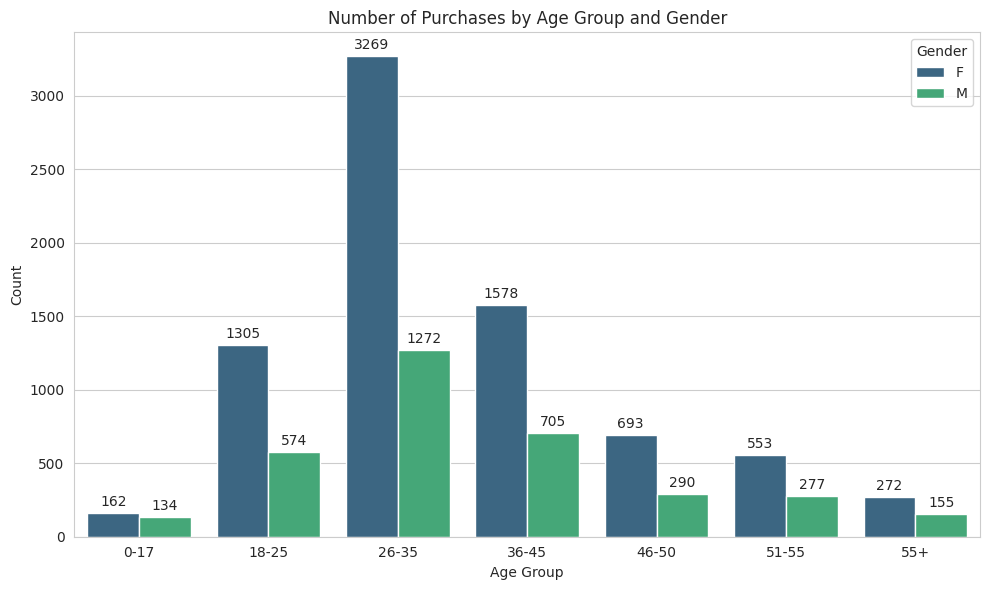

In [101]:
# Plot a count plot of age groups with hue as gender.
plt.figure(figsize=(10, 6))
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
ax = sns.countplot(data=df, x='Age Group', hue='Gender', palette='viridis', order=age_order)

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.title('Number of Purchases by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

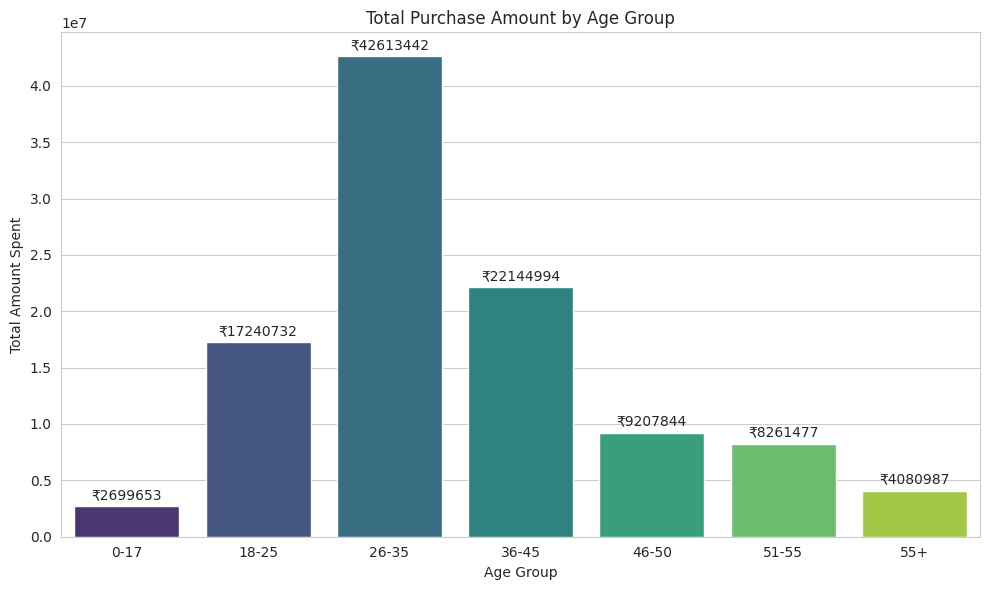

In [102]:
# Plot a bar chart showing total purchase amount by age group.
age_sales = df.groupby('Age Group')['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=age_sales, x='Age Group', y='Amount', hue='Age Group', palette='viridis', legend=False)

# Add total amount labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='₹%.0f', label_type='edge', padding=3)

plt.title('Total Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount Spent')
plt.tight_layout()
plt.show()

In [103]:
#The 26-35 age group has the most purchases and also the highest purchasing power.
#The purchasing power generally decreases as age increases after 35.

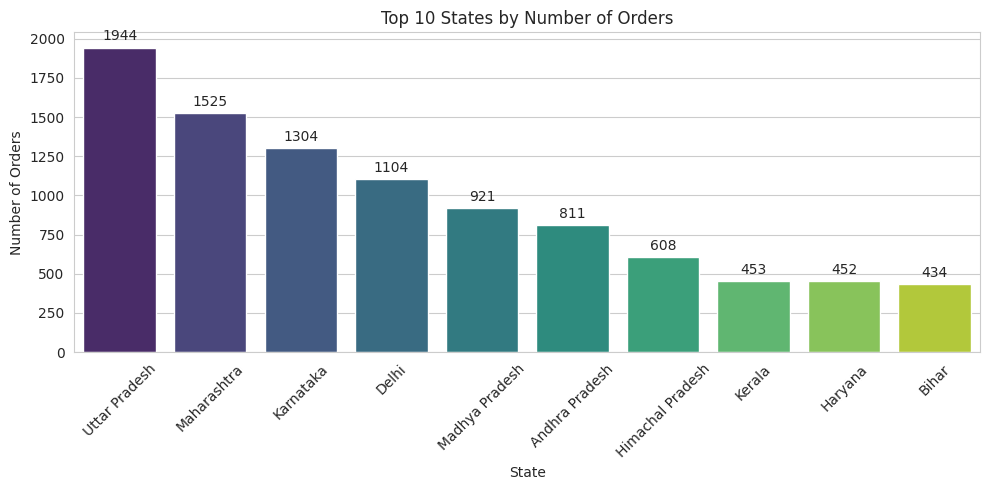

In [104]:
# Get top 10 states by number of orders
top_10_states_orders = df['State'].value_counts().nlargest(10).reset_index()
top_10_states_orders.columns = ['State', 'Order_Count']

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_10_states_orders, x='State', y='Order_Count', palette='viridis', hue='State', legend=False)

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.title("Top 10 States by Number of Orders")
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

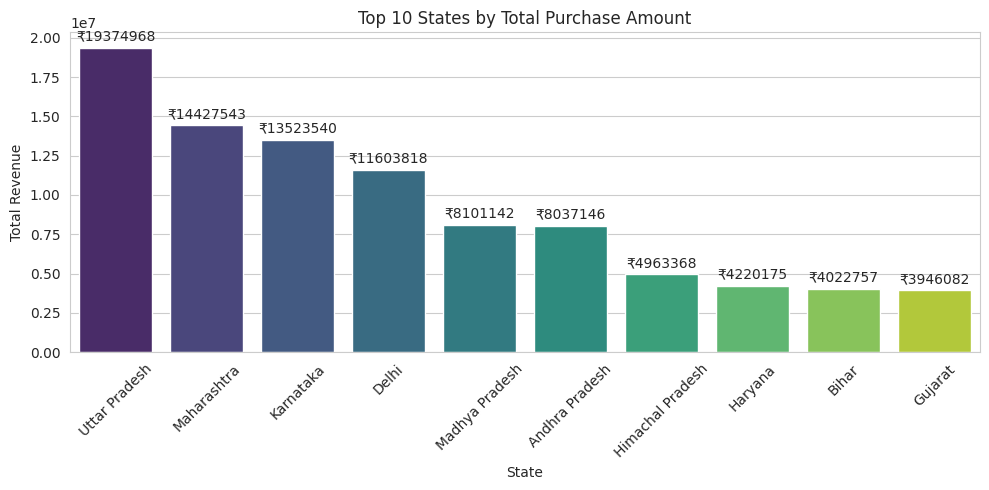

In [105]:
# Get top 10 states by total revenue
top_states_revenue = df.groupby('State')['Amount'].sum().nlargest(10).reset_index()

# Plot bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_states_revenue, x='State', y='Amount', palette='viridis', hue='State', legend=False)

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='₹%.0f', padding=3)

plt.title("Top 10 States by Total Purchase Amount")
plt.xlabel("State")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [106]:
#Uttar Pradesh, Maharashtra, and Karnataka are the top states in terms of both the number of orders and total revenue

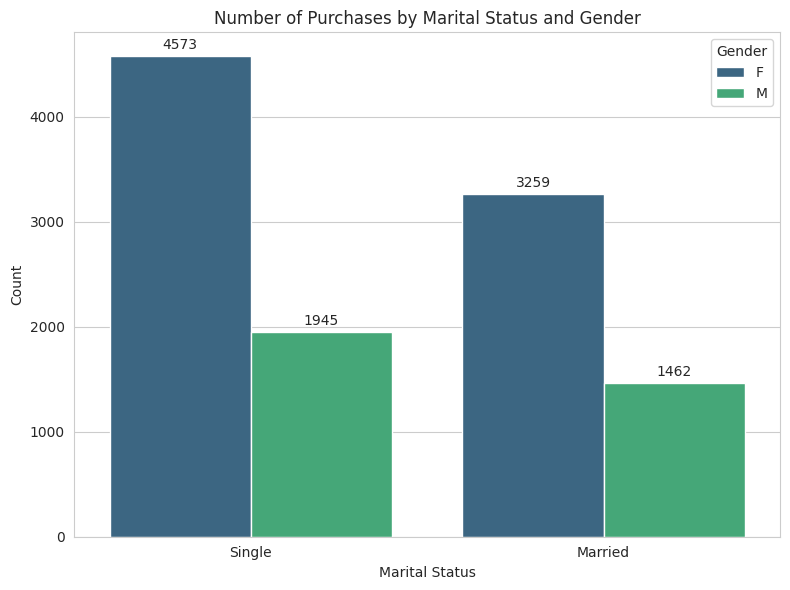

In [107]:
# Plot a count plot for marital status with gender as a hue
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Marital_Status', hue='Gender', palette='viridis')

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.title('Number of Purchases by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Single', 'Married'])
plt.tight_layout()
plt.show()

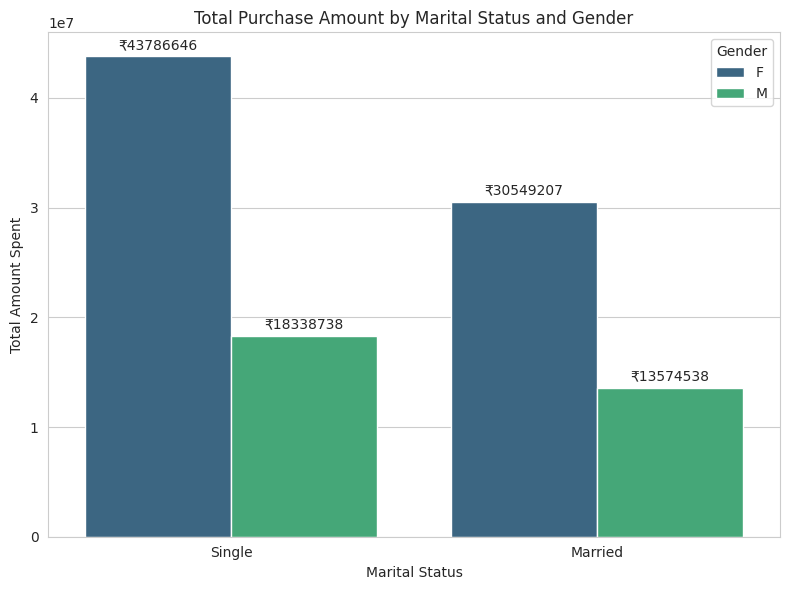

In [108]:
# Plot a bar chart showing total amount spent by marital status with gender as a hue
marital_sales = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=marital_sales, x='Marital_Status', y='Amount', hue='Gender', palette='viridis')

# Add total amount labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='₹%.0f', label_type='edge', padding=3)

plt.title('Total Purchase Amount by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Total Amount Spent')
plt.xticks(ticks=[0, 1], labels=['Single', 'Married'])
plt.tight_layout()
plt.show()

In [109]:
#Unmarried females and males make the highest number of purchases and unmarried females and males spend more on purchases than married individuals.

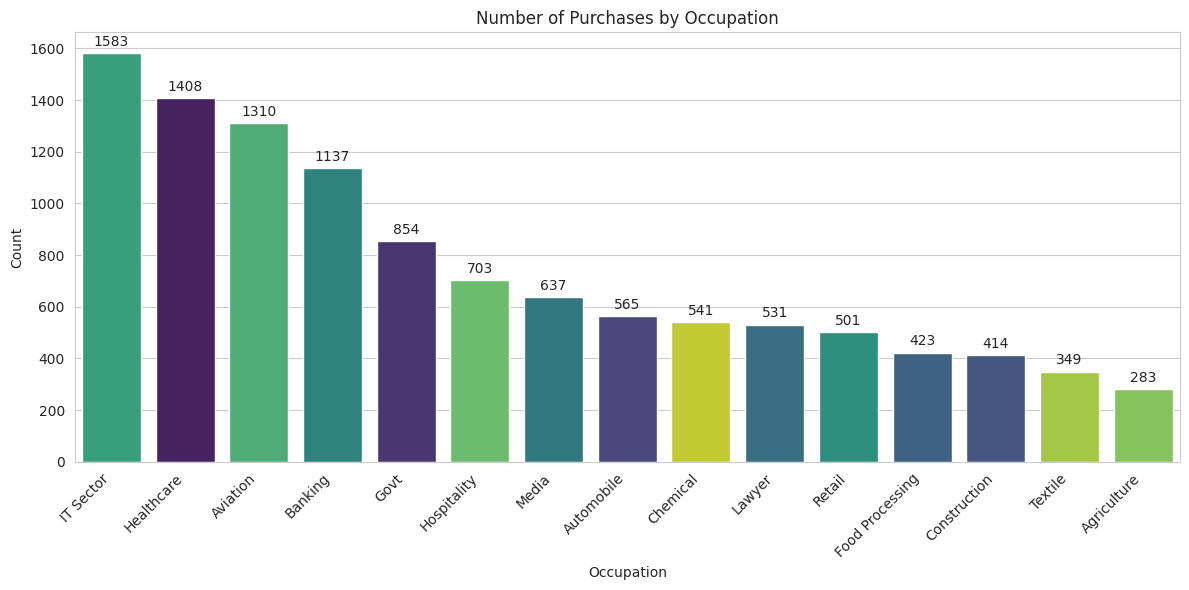

In [110]:
# Create a count plot for occupation
plt.figure(figsize=(12, 6))
occupation_counts = df['Occupation'].value_counts().index
ax = sns.countplot(data=df, x='Occupation', hue='Occupation', palette='viridis', legend=False, order=occupation_counts)

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.title('Number of Purchases by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

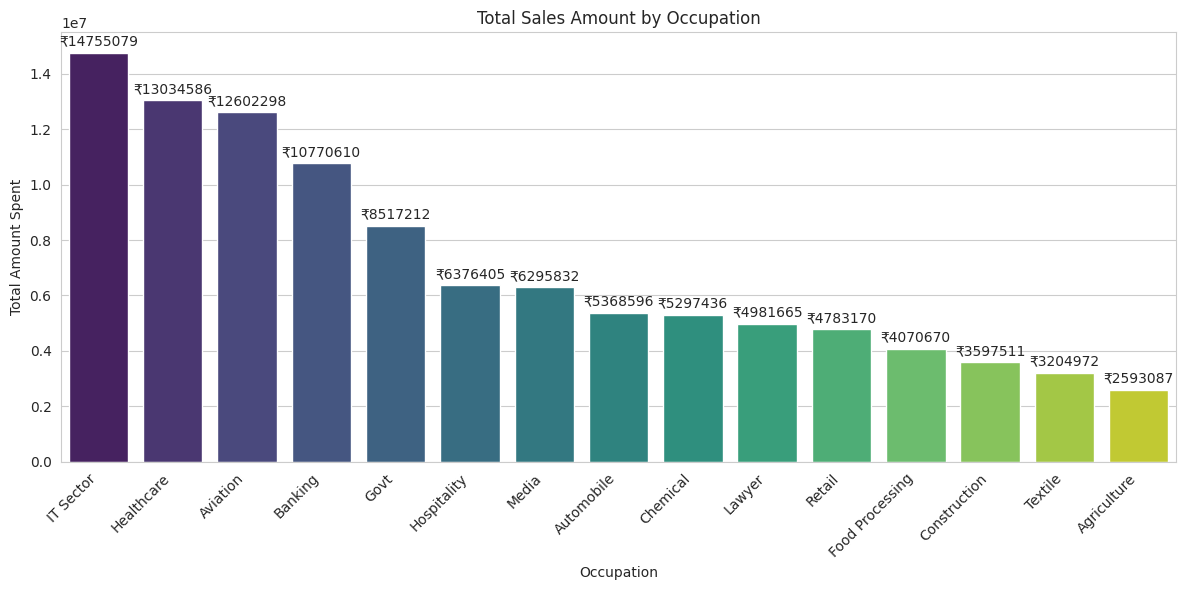

In [111]:
# Create a bar chart for total sales by occupation
occupation_sales = df.groupby('Occupation')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=occupation_sales, x='Occupation', y='Amount', hue='Occupation', palette='viridis', legend=False, order=occupation_sales['Occupation'])

# Add total amount labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='₹%.0f', label_type='edge', padding=3)

plt.title('Total Sales Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [112]:
#Customers in the IT Sector, Healthcare, and Aviation occupations contribute most significantly to sales in both purchase count and total spending.

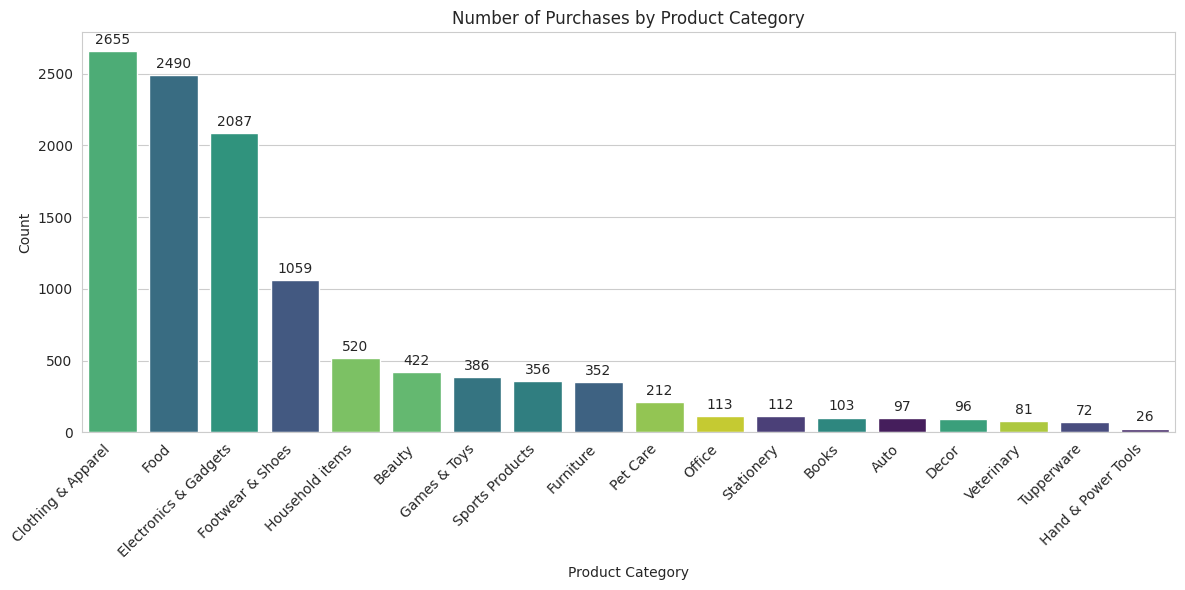

In [113]:
# Create a count plot for product categories.
plt.figure(figsize=(12, 6))
category_counts = df['Product_Category'].value_counts().index
ax = sns.countplot(data=df, x='Product_Category', hue='Product_Category', palette='viridis', legend=False, order=category_counts)

# Add count labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.title('Number of Purchases by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

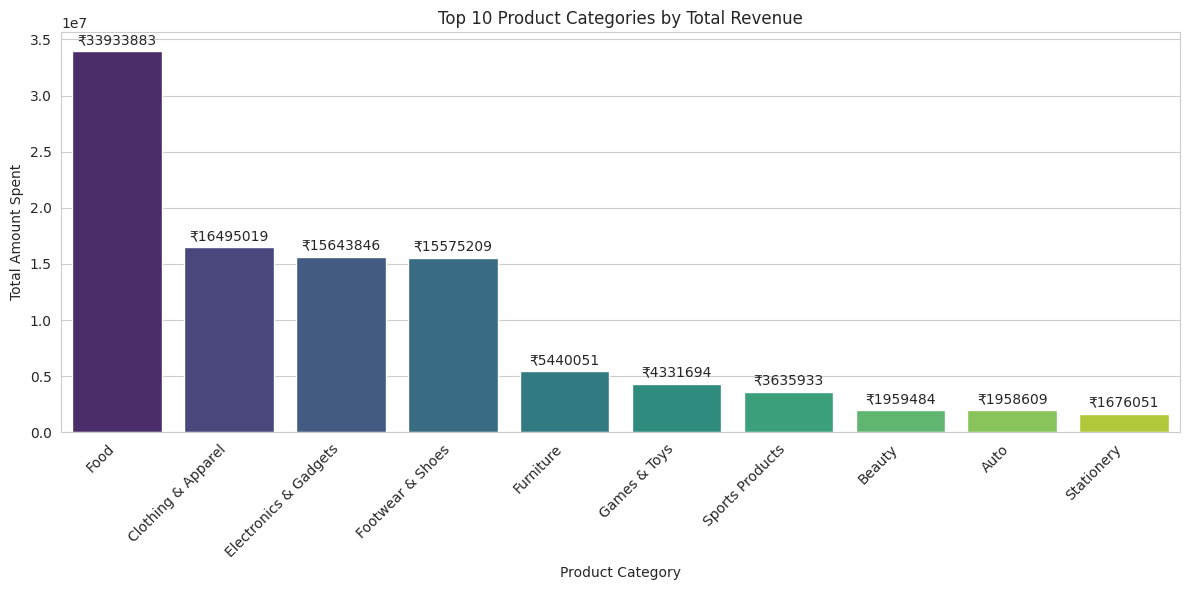

In [114]:
# Create a bar chart to show the total amount by product category for the top categories.
top_category_sales = df.groupby('Product_Category')['Amount'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_category_sales, x='Product_Category', y='Amount', hue='Product_Category', palette='viridis', legend=False)

# Add total amount labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='₹%.0f', label_type='edge', padding=3)

plt.title('Top 10 Product Categories by Total Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [115]:
#'Clothing & Apparel' is the product category with the highest number of purchases. 'Food' has the highest total revenue.

In [116]:
#Summary

#Based on the analysis we've conducted:
#Females have a higher number of purchases and higher total purchasing power compared to males.
#The 26-35 age group has the most purchases and the highest purchasing power. Purchasing power tends to decrease as age increases after 35.
#Uttar Pradesh, Maharashtra, and Karnataka are the top states in terms of both the number of orders and total revenue.
#Unmarried females and males make the highest number of purchases and unmarried females and males spend more on purchases than married individuals.
#Customers in the IT Sector, Healthcare, and Aviation occupations contribute most significantly to sales in both purchase count and total spending.
#'Clothing & Apparel' is the product category with the highest number of purchases. 'Food' has the highest total revenue.

In [117]:
#Based on these findings, a typical high-purchasing customer profile would likely be an unmarried female aged 26-35, living in Uttar Pradesh, Maharashtra, or Karnataka, working in the IT Sector, Healthcare, or Aviation, and frequently purchasing items from the 'Clothing & Apparel', 'Food', and 'Electronics & Gadgets' categories.